<a href="https://colab.research.google.com/github/Annie-jain/LGM_VIP-TASKS/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Prediction using Decision Tree Algorithm**



The purpose of decision tree classifier is if we feed any new ata to this classifier , it would be able to predict the right class accordingly

In [4]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("Iris_decisionTree.csv")


In [6]:
df.head(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
df.shape

(150, 6)

In [8]:
df.describe(include="all")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [13]:
#LabelEncoder is used to convert categorical value into numeric value
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df['Encoded species']=l.fit_transform(df['Species'])


In [15]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [16]:
x=df.drop(['Species'],axis=1)
y=df['Species']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [19]:
#fitting of train test set
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
prediction =  dt.predict(x_test)


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [22]:
print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [23]:
print(confusion_matrix(y_test,prediction))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [25]:
print(accuracy_score(y_test,prediction)*100,"%")

100.0 %


[Text(502.20000000000005, 453.0, 'X[5] <= 1.5\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(334.8, 271.8, 'X[4] <= 0.8\ngini = 0.496\nsamples = 68\nvalue = [31, 37, 0]'),
 Text(167.4, 90.59999999999997, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(502.20000000000005, 90.59999999999997, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(669.6, 271.8, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

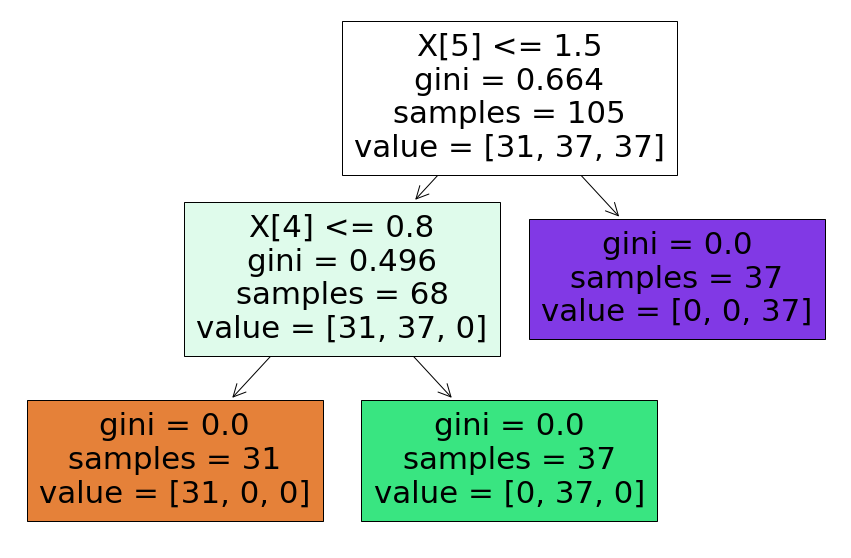

In [29]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)